# **Colab Pro notebook from https://github.com/TheLastBen/fast-stable-diffusion**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path_to_trained_model = "/content/gdrive/MyDrive/Fast-Dreambooth/Sessions/alya/alya.ckpt"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/30 [00:00<?, ?it/s]

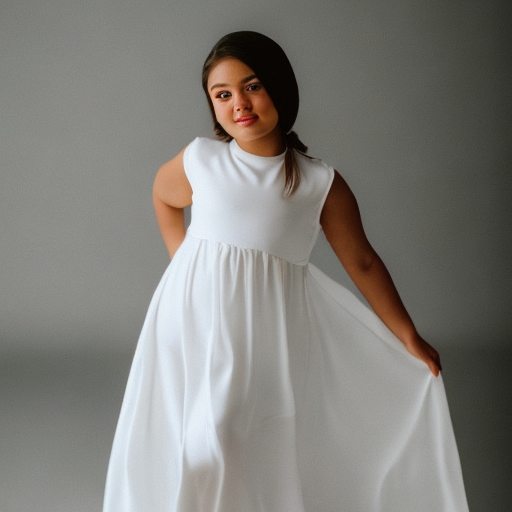

In [3]:
!pip install diffusers transformers accelerate safetensors --quiet

from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display

# 위에서 입력한 경로 그대로 사용
pipe = StableDiffusionPipeline.from_single_file(
    path_to_trained_model,
    torch_dtype=torch.float16,
    safety_checker=None,
).to("cuda")

prompt = "photo of alya wearing a white dress, studio lighting"
image = pipe(prompt, num_inference_steps=30).images[0]
display(image)


In [6]:
import json, os

# 설정값 입력 (token은 alya로 유지)
concepts = [
    {
        "instance_prompt": "photo of alya person",   # 학습 시 사용할 프롬프트
        "class_prompt": "photo of a person",         # 일반적인 사람 이미지와 비교 학습
        "instance_data_dir": "/content/gdrive/MyDrive/fast-Dreambooth/Sessions/alya/instance_images",
        "class_data_dir": "/content/gdrive/MyDrive/fast-Dreambooth/person"  # 일반 사람 이미지 (Colab에서 자동 다운로드됨)
    }
]

# 저장 경로 폴더 생성
os.makedirs("/content/gdrive/MyDrive/fast-Dreambooth/Sessions/alya/concept", exist_ok=True)

# 파일 저장
with open("/content/gdrive/MyDrive/fast-Dreambooth/Sessions/alya/concept/concepts_list.json", "w") as f:
    json.dump(concepts, f, indent=4)

print("✅ concepts_list.json 생성 완료!")


✅ concepts_list.json 생성 완료!


In [16]:
#@markdown # Dependencies

from IPython.utils import capture
import time
import os

print('[1;32mInstalling dependencies...')
with capture.capture_output() as cap:
    os.chdir('/content')
    !pip uninstall diffusers jax -qq -y
    !pip install -qq --no-deps accelerate==0.12.0
    !wget -q -i https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dependencies/dbdeps.txt
    !dpkg -i *.deb
    !tar -C / --zstd -xf gcolabdeps.tar.zst
    !rm *.deb | rm *.zst | rm *.txt
    !git clone -q --depth 1 --branch main https://github.com/TheLastBen/diffusers
    !pip install gradio==3.16.2 -qq
    !pip install wandb==0.15.12 pydantic==1.10.2 numpy==1.24.3 -qq --no-deps

    if not os.path.exists('gdrive/MyDrive/sd/libtcmalloc/libtcmalloc_minimal.so.4'):
        %env CXXFLAGS=-std=c++14
        !wget -q https://github.com/gperftools/gperftools/releases/download/gperftools-2.5/gperftools-2.5.tar.gz && tar zxf gperftools-2.5.tar.gz && mv gperftools-2.5 gperftools
        !wget -q https://github.com/TheLastBen/fast-stable-diffusion/raw/main/AUTOMATIC1111_files/Patch
        %cd /content/gperftools
        !patch -p1 < /content/Patch
        !./configure --enable-minimal --enable-libunwind --enable-frame-pointers --enable-dynamic-sized-delete-support --enable-sized-delete --enable-emergency-malloc; make -j4
        !mkdir -p /content/gdrive/MyDrive/sd/libtcmalloc && cp .libs/libtcmalloc*.so* /content/gdrive/MyDrive/sd/libtcmalloc
        %env LD_PRELOAD=/content/gdrive/MyDrive/sd/libtcmalloc/libtcmalloc_minimal.so.4
        %cd /content
        !rm *.tar.gz Patch && rm -r /content/gperftools
    else:
        %env LD_PRELOAD=/content/gdrive/MyDrive/sd/libtcmalloc/libtcmalloc_minimal.so.4

    os.environ['PYTHONWARNINGS'] = 'ignore'
    !sed -i 's@text = _formatwarnmsg(msg)@text =\"\"@g' /usr/lib/python3.11/warnings.py
    !sed -i 's@HfFolder, cached_download@HfFolder@g' /usr/local/lib/python3.11/dist-packages/diffusers/utils/dynamic_modules_utils.py
    !sed -i 's@from pytorch_lightning.loggers.wandb import WandbLogger  # noqa: F401@@g' /usr/local/lib/python3.11/dist-packages/pytorch_lightning/loggers/__init__.py
    !sed -i 's@from .mailbox import ContextCancelledError@@g' /usr/local/lib/python3.11/dist-packages/wandb/sdk/lib/retry.py
    !sed -i 's@raise ContextCancelledError("retry timeout")@print("retry timeout")@g' /usr/local/lib/python3.11/dist-packages/wandb/sdk/lib/retry.py
    !rm -r /usr/local/lib/python3.11/dist-packages/tensorflow*

print('[1;32mDone, proceed')

Installing dependencies...
Done, proceed


# Model Download

In [ ]:
import os
import time
from IPython.utils import capture
from IPython.display import clear_output
import wget
from subprocess import check_output
import urllib.request
import requests
import base64
from gdown.download import get_url_from_gdrive_confirmation
from urllib.parse import urlparse, parse_qs, unquote
from urllib.request import urlopen, Request
import re

def getsrc(url):
    parsed_url = urlparse(url)
    if parsed_url.netloc == 'civitai.com':
        src='civitai'
    elif parsed_url.netloc == 'drive.google.com':
        src='gdrive'
    elif parsed_url.netloc == 'huggingface.co':
        src='huggingface'
    else:
        src='others'
    return src



def get_name(url, gdrive):
    if not gdrive:
        response = requests.get(url, allow_redirects=False)
        if "Location" in response.headers:
            redirected_url = response.headers["Location"]
            quer = parse_qs(urlparse(redirected_url).query)
            if "response-content-disposition" in quer:
                disp_val = quer["response-content-disposition"][0].split(";")
                for vals in disp_val:
                    if vals.strip().startswith("filename="):
                        filenm=unquote(vals.split("=", 1)[1].strip())
                        return filenm.replace("\"","")
    else:
        headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36"}
        lnk="https://drive.google.com/uc?id={id}&export=download".format(id=url[url.find("/d/")+3:url.find("/view")])
        res = requests.session().get(lnk, headers=headers, stream=True, verify=True)
        res = requests.session().get(get_url_from_gdrive_confirmation(res.text), headers=headers, stream=True, verify=True)
        content_disposition = six.moves.urllib_parse.unquote(res.headers["Content-Disposition"])
        filenm = re.search('attachment; filename="(.*?)"', content_disposition).groups()[0]
        return filenm

#@markdown - Skip this cell if you are loading a previous session that contains a trained model.

#@markdown ---

Model_Version = "1.5" #@param [ "1.5", "V2.1-512px", "V2.1-768px"]

#@markdown - Choose which version to finetune.

with capture.capture_output() as cap:
  os.chdir('/content')

#@markdown ---

Path_to_HuggingFace= "" #@param {type:"string"}

#@markdown - Load and finetune a model from Hugging Face, use the format "profile/model" like : runwayml/stable-diffusion-v1-5
#@markdown - If the custom model is private or requires a token, create token.txt containing the token in "Fast-Dreambooth" folder in your gdrive.

MODEL_PATH = "" #@param {type:"string"}

MODEL_LINK = "" #@param {type:"string"}


if os.path.exists('/content/gdrive/MyDrive/Fast-Dreambooth/token.txt'):
  with open("/content/gdrive/MyDrive/Fast-Dreambooth/token.txt") as f:
     token = f.read()
  authe=f'https://USER:{token}@'
else:
  authe="https://"

def downloadmodel():

  if os.path.exists('/content/stable-diffusion-v1-5'):
    !rm -r /content/stable-diffusion-v1-5
  clear_output()

  os.chdir('/content')


  print("[1;32mDownloading the model...")
  !wget -q "https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.safetensors" -O model.safetensors

  if os.path.exists('/content/model.safetensors'):
      !wget -q -O config.yaml https://github.com/CompVis/stable-diffusion/raw/main/configs/stable-diffusion/v1-inference.yaml
      clear_output()
      !python /content/diffusers/scripts/convert_original_stable_diffusion_to_diffusers.py --checkpoint_path /content/model.safetensors --dump_path /content/stable-diffusion-v1-5 --original_config_file config.yaml --from_safetensors
      !rm config.yaml
      clear_output()
      os.chdir('/content/stable-diffusion-v1-5')
      !wget -q -O vae/diffusion_pytorch_model.bin https://huggingface.co/stabilityai/sd-vae-ft-mse/resolve/main/diffusion_pytorch_model.bin
      !rm model_index.json
      clear_output()
      time.sleep(1)
      wget.download('https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/model_index.json')
      os.chdir('/content')


def newdownloadmodel():

  os.chdir('/content')
  clear_output()
  !mkdir /content/stable-diffusion-v2-768
  os.chdir('/content/stable-diffusion-v2-768')
  !git config --global init.defaultBranch main
  !git init
  !git lfs install --system --skip-repo
  !git remote add -f origin  "https://huggingface.co/stabilityai/stable-diffusion-2-1"
  !git config core.sparsecheckout true
  !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nfeature_extractor\nmodel_index.json\n!*.safetensors\n!*.fp16.bin" > .git/info/sparse-checkout
  !git pull origin main
  !rm -r /content/stable-diffusion-v2-768/.git
  os.chdir('/content')
  clear_output()
  print('[1;32mDONE !')


def newdownloadmodelb():

  os.chdir('/content')
  clear_output()
  !mkdir /content/stable-diffusion-v2-512
  os.chdir('/content/stable-diffusion-v2-512')
  !git config --global init.defaultBranch main
  !git init
  !git lfs install --system --skip-repo
  !git remote add -f origin  "https://huggingface.co/stabilityai/stable-diffusion-2-1-base"
  !git config core.sparsecheckout true
  !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nfeature_extractor\nmodel_index.json\n!*.safetensors\n!*.fp16.bin" > .git/info/sparse-checkout
  !git pull origin main
  !rm -r /content/stable-diffusion-v2-512/.git
  os.chdir('/content')
  clear_output()
  print('[1;32mDONE !')


if Path_to_HuggingFace != "":
  if authe=="https://":
    textenc= f"{authe}huggingface.co/{Path_to_HuggingFace}/resolve/main/text_encoder/pytorch_model.bin"
    txtenc_size=urllib.request.urlopen(textenc).info().get('Content-Length', None)
  else:
    textenc= f"https://huggingface.co/{Path_to_HuggingFace}/resolve/main/text_encoder/pytorch_model.bin"
    req=urllib.request.Request(textenc)
    req.add_header('Authorization', f'Bearer {token}')
    txtenc_size=urllib.request.urlopen(req).info().get('Content-Length', None)
  if int(txtenc_size)> 670000000 :
    if os.path.exists('/content/stable-diffusion-custom'):
      !rm -r /content/stable-diffusion-custom
    clear_output()
    os.chdir('/content')
    clear_output()
    print("[1;32mV2")
    !mkdir /content/stable-diffusion-custom
    os.chdir('/content/stable-diffusion-custom')
    !git config --global init.defaultBranch main
    !git init
    !git lfs install --system --skip-repo
    !git remote add -f origin  "{authe}huggingface.co/{Path_to_HuggingFace}"
    !git config core.sparsecheckout true
    !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nfeature_extractor\nmodel_index.json\n!*.safetensors" > .git/info/sparse-checkout
    !git pull origin main
    if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
      !rm -r /content/stable-diffusion-custom/.git
      os.chdir('/content')
      MODEL_NAME="/content/stable-diffusion-custom"
      clear_output()
      print('[1;32mDONE !')
    else:
      while not os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
            print('[1;31mCheck the link you provided')
            time.sleep(5)
  else:
    if os.path.exists('/content/stable-diffusion-custom'):
      !rm -r /content/stable-diffusion-custom
    clear_output()
    os.chdir('/content')
    clear_output()
    print("[1;32mV1")
    !mkdir /content/stable-diffusion-custom
    os.chdir('/content/stable-diffusion-custom')
    !git init
    !git lfs install --system --skip-repo
    !git remote add -f origin  "{authe}huggingface.co/{Path_to_HuggingFace}"
    !git config core.sparsecheckout true
    !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nmodel_index.json\n!*.safetensors" > .git/info/sparse-checkout
    !git pull origin main
    if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
      !rm -r /content/stable-diffusion-custom/.git
      !rm model_index.json
      time.sleep(1)
      wget.download('https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/model_index.json')
      os.chdir('/content')
      MODEL_NAME="/content/stable-diffusion-custom"
      clear_output()
      print('[1;32mDONE !')
    else:
      while not os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
            print('[1;31mCheck the link you provided')
            time.sleep(5)

elif MODEL_PATH !="":

  modelname=os.path.basename(MODEL_PATH)
  sftnsr=""
  if modelname.split('.')[-1]=='safetensors':
    sftnsr="--from_safetensors"

  %cd /content
  clear_output()
  if os.path.exists(str(MODEL_PATH)):
    wget.download('https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/det.py')
    print('[1;33mDetecting model version...')
    Custom_Model_Version=check_output('python det.py '+sftnsr+' --MODEL_PATH '+str(MODEL_PATH), shell=True).decode('utf-8').replace('\n', '')
    clear_output()
    print('[1;32m'+Custom_Model_Version+' Detected')
    !rm det.py
    if Custom_Model_Version=='1.5':
      !wget -q -O config.yaml https://github.com/CompVis/stable-diffusion/raw/main/configs/stable-diffusion/v1-inference.yaml
      !python /content/diffusers/scripts/convert_original_stable_diffusion_to_diffusers.py --checkpoint_path "$MODEL_PATH" --dump_path stable-diffusion-custom --original_config_file config.yaml $sftnsr
      !rm /content/config.yaml

    elif Custom_Model_Version=='V2.1-512px':
      !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv2.py
      !python /content/convertodiff.py "$MODEL_PATH" /content/stable-diffusion-custom --v2 --reference_model stabilityai/stable-diffusion-2-1-base $sftnsr
      !rm /content/convertodiff.py

    elif Custom_Model_Version=='V2.1-768px':
      !wget -q -O convertodiff.py https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/convertodiffv2-768.py
      !python /content/convertodiff.py "$MODEL_PATH" /content/stable-diffusion-custom --v2 --reference_model stabilityai/stable-diffusion-2-1 $sftnsr
      !rm /content/convertodiff.py


    if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
      clear_output()
      MODEL_NAME="/content/stable-diffusion-custom"
      print('[1;32mDONE !')
    else:
      !rm -r /content/stable-diffusion-custom
      while not os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
        print('[1;31mConversion error')
        time.sleep(5)
  else:
    while not os.path.exists(str(MODEL_PATH)):
       print('[1;31mWrong path, use the colab file explorer to copy the path')
       time.sleep(5)

elif MODEL_LINK !="":
    os.chdir('/content')

    src=getsrc(MODEL_LINK)

    if src=='civitai':
       modelname=get_name(str(MODEL_LINK), False)
    elif src=='gdrive':
       modelname=get_name(str(MODEL_LINK), True)
    else:
       modelname=os.path.basename(str(MODEL_LINK))

    sftnsr=""
    if modelname.split('.')[-1]!='safetensors':
      modelnm="model.ckpt"
    else:
      modelnm="model.safetensors"
      sftnsr="--from_safetensors"

    !gdown --fuzzy "$MODEL_LINK" -O $modelnm

    if os.path.exists(modelnm):
      if os.path.getsize(modelnm) > 1810671599:
        wget.download('https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/det.py')
        print('[1;33mDetecting model version...')
        Custom_Model_Version=check_output('python det.py '+sftnsr+' --MODEL_PATH '+modelnm, shell=True).decode('utf-8').replace('\n', '')
        clear_output()
        print('[1;32m'+Custom_Model_Version+' Detected')
        !rm det.py
        if Custom_Model_Version=='1.5':
          !wget -q -O config.yaml https://github.com/CompVis/stable-diffusion/raw/main/configs/stable-diffusion/v1-inference.yaml
          !python /content/diffusers/scripts/convert_original_stable_diffusion_to_diffusers.py --checkpoint_path $modelnm --dump_path stable-diffusion-custom --original_config_file config.yaml $sftnsr
          !rm config.yaml

        elif Custom_Model_Version=='V2.1-512px':
          !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv2.py
          !python /content/convertodiff.py $modelnm /content/stable-diffusion-custom --v2 --reference_model stabilityai/stable-diffusion-2-1-base $sftnsr
          !rm convertodiff.py

        elif Custom_Model_Version=='V2.1-768px':
          !wget -q -O convertodiff.py https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/convertodiffv2-768.py
          !python /content/convertodiff.py $modelnm /content/stable-diffusion-custom --v2 --reference_model stabilityai/stable-diffusion-2-1 $sftnsr
          !rm convertodiff.py


        if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
          clear_output()
          MODEL_NAME="/content/stable-diffusion-custom"
          print('[1;32mDONE !')
        else:
          !rm -r stable-diffusion-custom
          !rm $modelnm
          while not os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
            print('[1;31mConversion error')
            time.sleep(5)
      else:
        while os.path.getsize(modelnm) < 1810671599:
           print('[1;31mWrong link, check that the link is valid')
           time.sleep(5)

else:
  if Model_Version=="1.5":
    if not os.path.exists('/content/stable-diffusion-v1-5/unet'):
      downloadmodel()
      MODEL_NAME="/content/stable-diffusion-v1-5"
      print("[1;32mv1.5 model downloaded")
    else:
      MODEL_NAME="/content/stable-diffusion-v1-5"
      print("[1;32mThe v1.5 model already exists, using this model.")
  elif Model_Version=="V2.1-512px":
    if not os.path.exists('/content/stable-diffusion-v2-512'):
      newdownloadmodelb()
      MODEL_NAME="/content/stable-diffusion-v2-512"
    else:
      MODEL_NAME="/content/stable-diffusion-v2-512"
      print("[1;32mThe v2-512px model already exists, using this model.")
  elif Model_Version=="V2.1-768px":
    if not os.path.exists('/content/stable-diffusion-v2-768'):
      newdownloadmodel()
      MODEL_NAME="/content/stable-diffusion-v2-768"
    else:
      MODEL_NAME="/content/stable-diffusion-v2-768"
      print("[1;32mThe v2-768px model already exists, using this model.")

Converting to Diffusers ...


# Dreambooth

In [ ]:
import os
from IPython.display import clear_output
from IPython.utils import capture
from os import listdir
from os.path import isfile
from subprocess import check_output
import wget
import time

#@markdown #Create/Load a Session

try:
  MODEL_NAME
  pass
except:
  MODEL_NAME=""

PT=""

Session_Name = "" #@param{type: 'string'}
while Session_Name=="":
  print('[1;31mInput the Session Name:')
  Session_Name=input('')
Session_Name=Session_Name.replace(" ","_")

#@markdown - Enter the session name, it if it exists, it will load it, otherwise it'll create an new session.

Session_Link_optional = "" #@param{type: 'string'}

#@markdown - Import a session from another gdrive, the shared gdrive link must point to the specific session's folder that contains the trained CKPT, remove any intermediary CKPT if any.

WORKSPACE='/content/gdrive/MyDrive/Fast-Dreambooth'

if Session_Link_optional !="":
  print('[1;32mDownloading session...')
  with capture.capture_output() as cap:
    %cd /content
    if not os.path.exists(str(WORKSPACE+'/Sessions')):
      %mkdir -p $WORKSPACE'/Sessions'
      time.sleep(1)
    %cd $WORKSPACE'/Sessions'
    !gdown --folder --remaining-ok -O $Session_Name  $Session_Link_optional
    %cd $Session_Name
    !rm -r instance_images
    !unzip instance_images.zip
    !rm -r captions
    !unzip captions.zip
    %cd /content


INSTANCE_NAME=Session_Name
OUTPUT_DIR="/content/models/"+Session_Name
SESSION_DIR=WORKSPACE+'/Sessions/'+Session_Name
INSTANCE_DIR=SESSION_DIR+'/instance_images'
CAPTIONS_DIR=SESSION_DIR+'/captions'
MDLPTH=str(SESSION_DIR+"/"+Session_Name+'.ckpt')

if os.path.exists(str(SESSION_DIR)):
  mdls=[ckpt for ckpt in listdir(SESSION_DIR) if ckpt.split(".")[-1]=="ckpt"]
  if not os.path.exists(MDLPTH) and '.ckpt' in str(mdls):

    def f(n):
      k=0
      for i in mdls:
        if k==n:
          !mv "$SESSION_DIR/$i" $MDLPTH
        k=k+1

    k=0
    print('[1;33mNo final checkpoint model found, select which intermediary checkpoint to use, enter only the number, (000 to skip):\n[1;34m')

    for i in mdls:
      print(str(k)+'- '+i)
      k=k+1
    n=input()
    while int(n)>k-1:
      n=input()
    if n!="000":
      f(int(n))
      print('[1;32mUsing the model '+ mdls[int(n)]+" ...")
      time.sleep(2)
    else:
      print('[1;32mSkipping the intermediary checkpoints.')
    del n

with capture.capture_output() as cap:
  %cd /content
  resume=False

if os.path.exists(str(SESSION_DIR)) and not os.path.exists(MDLPTH):
  print('[1;32mLoading session with no previous model, using the original model or the custom downloaded model')
  if MODEL_NAME=="":
    print('[1;31mNo model found, use the "Model Download" cell to download a model.')
  else:
    print('[1;32mSession Loaded, proceed to uploading instance images')

elif os.path.exists(MDLPTH):
  print('[1;32mSession found, loading the trained model ...')
  wget.download('https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/det.py')
  print('[1;33mDetecting model version...')
  Model_Version=check_output('python det.py --MODEL_PATH '+MDLPTH, shell=True).decode('utf-8').replace('\n', '')
  clear_output()
  print('[1;32m'+Model_Version+' Detected')
  !rm det.py
  if Model_Version=='1.5':
    !wget -q -O config.yaml https://github.com/CompVis/stable-diffusion/raw/main/configs/stable-diffusion/v1-inference.yaml
    print('[1;32mSession found, loading the trained model ...')
    !python /content/diffusers/scripts/convert_original_stable_diffusion_to_diffusers.py --checkpoint_path $MDLPTH --dump_path "$OUTPUT_DIR" --original_config_file config.yaml
    !rm /content/config.yaml

  elif Model_Version=='V2.1-512px':
    !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv2.py
    print('[1;32mSession found, loading the trained model ...')
    !python /content/convertodiff.py "$MDLPTH" "$OUTPUT_DIR" --v2 --reference_model stabilityai/stable-diffusion-2-1-base
    !rm /content/convertodiff.py

  elif Model_Version=='V2.1-768px':
    !wget -q -O convertodiff.py https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/convertodiffv2-768.py
    print('[1;32mSession found, loading the trained model ...')
    !python /content/convertodiff.py "$MDLPTH" "$OUTPUT_DIR" --v2 --reference_model stabilityai/stable-diffusion-2-1
    !rm /content/convertodiff.py


  if os.path.exists(OUTPUT_DIR+'/unet/diffusion_pytorch_model.bin'):
    resume=True
    clear_output()
    print('[1;32mSession loaded.')
  else:
    if not os.path.exists(OUTPUT_DIR+'/unet/diffusion_pytorch_model.bin'):
      print('[1;31mConversion error, if the error persists, remove the CKPT file from the current session folder')

elif not os.path.exists(str(SESSION_DIR)):
    %mkdir -p "$INSTANCE_DIR"
    print('[1;32mCreating session...')
    if MODEL_NAME=="":
      print('[1;31mNo model found, use the "Model Download" cell to download a model.')
    else:
      print('[1;32mSession created, proceed to uploading instance images')

    #@markdown

    #@markdown # The most important step is to rename the instance pictures of each subject to a unique unknown identifier, example :
    #@markdown - If you have 10 pictures of yourself, simply select them all and rename only one to the chosen identifier for example : phtmejhn, the files would be : phtmejhn (1).jpg, phtmejhn (2).png ....etc then upload them, do the same for other people or objects with a different identifier, and that's it.
    #@markdown - Checkout this example : https://i.imgur.com/d2lD3rz.jpeg

In [ ]:
import shutil
from google.colab import files
import time
from PIL import Image
from tqdm import tqdm
import ipywidgets as widgets
from io import BytesIO
import wget

with capture.capture_output() as cap:
  %cd /content
  if not os.path.exists("/content/smart_crop.py"):
    wget.download('https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/smart_crop.py')
  from smart_crop import *

#@markdown #Instance Images
#@markdown ----

#@markdown
#@markdown - Run the cell to upload the instance pictures.
#@markdown - You can add `external captions` in txt files by simply giving each txt file the same name as the instance image, for example dikgur (1).jpg and dikgur (1).txt, and upload them here, to use the external captions, check the box "external_captions" in the training cell. `All the images must have one same extension` jpg or png or....etc

Remove_existing_instance_images= True #@param{type: 'boolean'}
#@markdown - Uncheck the box to keep the existing instance images.

if Remove_existing_instance_images:
  if os.path.exists(str(INSTANCE_DIR)):
    !rm -r "$INSTANCE_DIR"
  if os.path.exists(str(CAPTIONS_DIR)):
    !rm -r "$CAPTIONS_DIR"

if not os.path.exists(str(INSTANCE_DIR)):
  %mkdir -p "$INSTANCE_DIR"
if not os.path.exists(str(CAPTIONS_DIR)):
  %mkdir -p "$CAPTIONS_DIR"

if os.path.exists(INSTANCE_DIR+"/.ipynb_checkpoints"):
  %rm -r $INSTANCE_DIR"/.ipynb_checkpoints"


IMAGES_FOLDER_OPTIONAL="" #@param{type: 'string'}

#@markdown - If you prefer to specify directly the folder of the pictures instead of uploading, this will add the pictures to the existing (if any) instance images. Leave EMPTY to upload.

Smart_Crop_images= True #@param{type: 'boolean'}
Crop_size = 512 #@param ["512", "576", "640", "704", "768", "832", "896", "960", "1024"] {type:"raw"}

#@markdown - Smart crop the images without manual intervention.

while IMAGES_FOLDER_OPTIONAL !="" and not os.path.exists(str(IMAGES_FOLDER_OPTIONAL)):
  print('[1;31mThe image folder specified does not exist, use the colab file explorer to copy the path :')
  IMAGES_FOLDER_OPTIONAL=input('')

if IMAGES_FOLDER_OPTIONAL!="":
  if os.path.exists(IMAGES_FOLDER_OPTIONAL+"/.ipynb_checkpoints"):
    %rm -r "$IMAGES_FOLDER_OPTIONAL""/.ipynb_checkpoints"

  with capture.capture_output() as cap:
    !mv $IMAGES_FOLDER_OPTIONAL/*.txt $CAPTIONS_DIR
  if Smart_Crop_images:
    for filename in tqdm(os.listdir(IMAGES_FOLDER_OPTIONAL), bar_format='  |{bar:15}| {n_fmt}/{total_fmt} Uploaded'):
      extension = filename.split(".")[-1]
      identifier=filename.split(".")[0]
      new_path_with_file = os.path.join(INSTANCE_DIR, filename)
      file = Image.open(IMAGES_FOLDER_OPTIONAL+"/"+filename)
      width, height = file.size
      if file.size !=(Crop_size, Crop_size):
        image=crop_image(file, Crop_size)
        if extension.upper()=="JPG" or extension.upper()=="jpg":
            image[0] = image[0].convert("RGB")
            image[0].save(new_path_with_file, format="JPEG", quality = 100)
        else:
            image[0].save(new_path_with_file, format=extension.upper())
      else:
        !cp "$IMAGES_FOLDER_OPTIONAL/$filename" "$INSTANCE_DIR"

  else:
    for filename in tqdm(os.listdir(IMAGES_FOLDER_OPTIONAL), bar_format='  |{bar:15}| {n_fmt}/{total_fmt} Uploaded'):
      %cp -r "$IMAGES_FOLDER_OPTIONAL/$filename" "$INSTANCE_DIR"

  print('\n[1;32mDone, proceed to the next cell')


elif IMAGES_FOLDER_OPTIONAL =="":
  up=""
  uploaded = files.upload()
  for filename in uploaded.keys():
    if filename.split(".")[-1]=="txt":
      shutil.move(filename, CAPTIONS_DIR)
    up=[filename for filename in uploaded.keys() if filename.split(".")[-1]!="txt"]
  if Smart_Crop_images:
    for filename in tqdm(up, bar_format='  |{bar:15}| {n_fmt}/{total_fmt} Uploaded'):
      shutil.move(filename, INSTANCE_DIR)
      extension = filename.split(".")[-1]
      identifier=filename.split(".")[0]
      new_path_with_file = os.path.join(INSTANCE_DIR, filename)
      file = Image.open(new_path_with_file)
      width, height = file.size
      if file.size !=(Crop_size, Crop_size):
        image=crop_image(file, Crop_size)
        if extension.upper()=="JPG" or extension.upper()=="jpg":
            image[0] = image[0].convert("RGB")
            image[0].save(new_path_with_file, format="JPEG", quality = 100)
        else:
            image[0].save(new_path_with_file, format=extension.upper())
      clear_output()
  else:
    for filename in tqdm(uploaded.keys(), bar_format='  |{bar:15}| {n_fmt}/{total_fmt} Uploaded'):
      shutil.move(filename, INSTANCE_DIR)
      clear_output()
  print('\n[1;32mDone, proceed to the next cell')

with capture.capture_output() as cap:
  %cd "$INSTANCE_DIR"
  !find . -name "* *" -type f | rename 's/ /-/g'
  %cd "$CAPTIONS_DIR"
  !find . -name "* *" -type f | rename 's/ /-/g'

  %cd $SESSION_DIR
  !rm instance_images.zip captions.zip
  !zip -r instance_images instance_images
  !zip -r captions captions
  %cd /content

In [ ]:
import ipywidgets as widgets
from io import BytesIO
#@markdown #Captions (optional)

#@markdown - Open a tool to manually `create` captions or edit existing captions of the instance images, do not use captions when training on a face.

paths=""
out=""
widgets_l=""
clear_output()
def Caption(path):
    if path!="Select an instance image to caption":

      name = os.path.splitext(os.path.basename(path))[0]
      ext=os.path.splitext(os.path.basename(path))[-1][1:]
      if ext=="jpg" or "JPG":
        ext="JPEG"

      if os.path.exists(CAPTIONS_DIR+"/"+name + '.txt'):
        with open(CAPTIONS_DIR+"/"+name + '.txt', 'r') as f:
            text = f.read()
      else:
        with open(CAPTIONS_DIR+"/"+name + '.txt', 'w') as f:
            f.write("")
            with open(CAPTIONS_DIR+"/"+name + '.txt', 'r') as f:
                text = f.read()

      img=Image.open(os.path.join(INSTANCE_DIR,path))
      img=img.convert("RGB")
      img=img.resize((420, 420))
      image_bytes = BytesIO()
      img.save(image_bytes, format=ext, qualiy=10)
      image_bytes.seek(0)
      image_data = image_bytes.read()
      img= image_data
      image = widgets.Image(
          value=img,
          width=420,
          height=420
      )
      text_area = widgets.Textarea(value=text, description='', disabled=False, layout={'width': '300px', 'height': '120px'})


      def update_text(text):
          with open(CAPTIONS_DIR+"/"+name + '.txt', 'w') as f:
              f.write(text)

      button = widgets.Button(description='Save', button_style='success')
      button.on_click(lambda b: update_text(text_area.value))

      return widgets.VBox([widgets.HBox([image, text_area, button])])


paths = os.listdir(INSTANCE_DIR)
widgets_l = widgets.Select(options=["Select an instance image to caption"]+paths, rows=25)


out = widgets.Output()

def click(change):
    with out:
        out.clear_output()
        display(Caption(change.new))

widgets_l.observe(click, names='value')
display(widgets.HBox([widgets_l, out]))

# Training

In [13]:
# ✅ 학습에 필요한 기본 경로 변수 설정
INSTANCE_DIR = "/content/gdrive/MyDrive/fast-Dreambooth/Sessions/alya/instance_images"
OUTPUT_DIR = "/content/gdrive/MyDrive/fast-Dreambooth/Sessions/alya"
CAPTIONS_DIR = "/content/gdrive/MyDrive/fast-Dreambooth/Sessions/alya/captions"

print("✅ 경로 설정 완료")


✅ 경로 설정 완료


In [14]:
resume = False
Resume_Training = False


In [15]:
#@markdown ---
#@markdown #Start DreamBooth
#@markdown ---
import os
from IPython.display import clear_output
from google.colab import runtime
from subprocess import getoutput
import time
import random

if os.path.exists(INSTANCE_DIR+"/.ipynb_checkpoints"):
  %rm -r $INSTANCE_DIR"/.ipynb_checkpoints"

if os.path.exists(CAPTIONS_DIR+"/.ipynb_checkpoints"):
  %rm -r $CAPTIONS_DIR"/.ipynb_checkpoints"

Resume_Training = False #@param {type:"boolean"}

if resume and not Resume_Training:
  print('[1;31mOverwrite your previously trained model ? answering "yes" will train a new model, answering "no" will resume the training of the previous model?  yes or no ?[0m')
  while True:
    ansres=input('')
    if ansres=='no':
      Resume_Training = True
      break
    elif ansres=='yes':
      Resume_Training = False
      resume= False
      break

while not Resume_Training and MODEL_NAME=="":
  print('[1;31mNo model found, use the "Model Download" cell to download a model.')
  time.sleep(5)

#@markdown  - If you're not satisfied with the result, check this box, run again the cell and it will continue training the current model.

MODELT_NAME=MODEL_NAME

UNet_Training_Steps=1500 #@param{type: 'number'}
UNet_Learning_Rate = 2e-6 #@param ["2e-5","1e-5","9e-6","8e-6","7e-6","6e-6","5e-6", "4e-6", "3e-6", "2e-6"] {type:"raw"}
untlr=UNet_Learning_Rate

#@markdown - These default settings are for a dataset of 10 pictures which is enough for training a face, start with 1500 or lower, test the model, if not enough, resume training for 200 steps, keep testing until you get the desired output, `set it to 0 to train only the text_encoder`.

Text_Encoder_Training_Steps=350 #@param{type: 'number'}

#@markdown - 200-450 steps is enough for a small dataset, keep this number small to avoid overfitting, set to 0 to disable, `set it to 0 before resuming training if it is already trained`.

Text_Encoder_Learning_Rate = 1e-6 #@param ["2e-6", "1e-6","8e-7","6e-7","5e-7","4e-7"] {type:"raw"}
txlr=Text_Encoder_Learning_Rate

#@markdown - Learning rate for the text_encoder, keep it low to avoid overfitting (1e-6 is higher than 4e-7)


trnonltxt=""
if UNet_Training_Steps==0:
   trnonltxt="--train_only_text_encoder"

Seed=''

ofstnse=""
Offset_Noise = False #@param {type:"boolean"}
#@markdown - Always use it for style training.

if Offset_Noise:
  ofstnse="--offset_noise"

External_Captions = False #@param {type:"boolean"}
#@markdown - Get the captions from a text file for each instance image.
extrnlcptn=""
if External_Captions:
  extrnlcptn="--external_captions"

Resolution = "512" #@param ["512", "576", "640", "704", "768", "832", "896", "960", "1024"]
Res=int(Resolution)

#@markdown - Higher resolution = Higher quality, make sure the instance images are cropped to this selected size (or larger).

fp16 = True

if Seed =='' or Seed=='0':
  Seed=random.randint(1, 999999)
else:
  Seed=int(Seed)

if fp16:
  prec="fp16"
else:
  prec="no"

precision=prec

resuming=""
if Resume_Training and os.path.exists(OUTPUT_DIR+'/unet/diffusion_pytorch_model.bin'):
  MODELT_NAME=OUTPUT_DIR
  print('[1;32mResuming Training...[0m')
  resuming="Yes"
elif Resume_Training and not os.path.exists(OUTPUT_DIR+'/unet/diffusion_pytorch_model.bin'):
  print('[1;31mPrevious model not found, training a new model...[0m')
  MODELT_NAME=MODEL_NAME
  while MODEL_NAME=="":
    print('[1;31mNo model found, use the "Model Download" cell to download a model.')
    time.sleep(5)

V2=False
if os.path.getsize(MODELT_NAME+"/text_encoder/pytorch_model.bin") > 670901463:
  V2=True

s = getoutput('nvidia-smi')
GCUNET="--gradient_checkpointing"
TexRes=Res
if Res<=768:
  GCUNET=""

if V2:
  if Res>704:
    GCUNET="--gradient_checkpointing"
  if Res>576:
    TexRes=576

if 'A100' in s :
   GCUNET=""
   TexRes=Res


Enable_text_encoder_training= True

if Text_Encoder_Training_Steps==0 :
   Enable_text_encoder_training= False
else:
  stptxt=Text_Encoder_Training_Steps


#@markdown ---------------------------
Save_Checkpoint_Every_n_Steps = False #@param {type:"boolean"}
Save_Checkpoint_Every=500 #@param{type: 'number'}
if Save_Checkpoint_Every==None:
  Save_Checkpoint_Every=1
#@markdown - Minimum 200 steps between each save.
stp=0
Start_saving_from_the_step=500 #@param{type: 'number'}
if Start_saving_from_the_step==None:
  Start_saving_from_the_step=0
if (Start_saving_from_the_step < 200):
  Start_saving_from_the_step=Save_Checkpoint_Every
stpsv=Start_saving_from_the_step
if Save_Checkpoint_Every_n_Steps:
  stp=Save_Checkpoint_Every
#@markdown - Start saving intermediary checkpoints from this step.

Disconnect_after_training=False #@param {type:"boolean"}

#@markdown - Auto-disconnect from google colab after the training to avoid wasting compute units.

def dump_only_textenc(trnonltxt, MODELT_NAME, INSTANCE_DIR, OUTPUT_DIR, PT, Seed, precision, Training_Steps):

    !accelerate launch /content/diffusers/examples/dreambooth/train_dreambooth.py \
    $trnonltxt \
    $extrnlcptn \
    $ofstnse \
    --image_captions_filename \
    --train_text_encoder \
    --dump_only_text_encoder \
    --pretrained_model_name_or_path="$MODELT_NAME" \
    --instance_data_dir="$INSTANCE_DIR" \
    --output_dir="$OUTPUT_DIR" \
    --captions_dir="$CAPTIONS_DIR" \
    --instance_prompt="$PT" \
    --seed=$Seed \
    --resolution=$TexRes \
    --mixed_precision=$precision \
    --train_batch_size=1 \
    --gradient_accumulation_steps=1 --gradient_checkpointing \
    --use_8bit_adam \
    --learning_rate=$txlr \
    --lr_scheduler="linear" \
    --lr_warmup_steps=0 \
    --max_train_steps=$Training_Steps

def train_only_unet(stpsv, stp, SESSION_DIR, MODELT_NAME, INSTANCE_DIR, OUTPUT_DIR, PT, Seed, Res, precision, Training_Steps):
    clear_output()
    if resuming=="Yes":
      print('[1;32mResuming Training...[0m')
    print('[1;33mTraining the UNet...[0m')
    !accelerate launch /content/diffusers/examples/dreambooth/train_dreambooth.py \
    $extrnlcptn \
    $ofstnse \
    --image_captions_filename \
    --train_only_unet \
    --save_starting_step=$stpsv \
    --save_n_steps=$stp \
    --Session_dir=$SESSION_DIR \
    --pretrained_model_name_or_path="$MODELT_NAME" \
    --instance_data_dir="$INSTANCE_DIR" \
    --output_dir="$OUTPUT_DIR" \
    --captions_dir="$CAPTIONS_DIR" \
    --instance_prompt="$PT" \
    --seed=$Seed \
    --resolution=$Res \
    --mixed_precision=$precision \
    --train_batch_size=1 \
    --gradient_accumulation_steps=1 $GCUNET \
    --use_8bit_adam \
    --learning_rate=$untlr \
    --lr_scheduler="linear" \
    --lr_warmup_steps=0 \
    --max_train_steps=$Training_Steps


if Enable_text_encoder_training :
  print('[1;33mTraining the text encoder...[0m')
  if os.path.exists(OUTPUT_DIR+'/'+'text_encoder_trained'):
    %rm -r $OUTPUT_DIR"/text_encoder_trained"
  dump_only_textenc(trnonltxt, MODELT_NAME, INSTANCE_DIR, OUTPUT_DIR, PT, Seed, precision, Training_Steps=stptxt)


if UNet_Training_Steps!=0:
  train_only_unet(stpsv, stp, SESSION_DIR, MODELT_NAME, INSTANCE_DIR, OUTPUT_DIR, PT, Seed, Res, precision, Training_Steps=UNet_Training_Steps)

if UNet_Training_Steps==0 and Text_Encoder_Training_Steps==0 :
  print('[1;32mNothing to do')
else:
  if os.path.exists('/content/models/'+INSTANCE_NAME+'/unet/diffusion_pytorch_model.bin'):
    prc="--fp16" if precision=="fp16" else ""
    !python /content/diffusers/scripts/convertosdv2.py $prc $OUTPUT_DIR $SESSION_DIR/$Session_Name".ckpt"
    clear_output()
    if os.path.exists(SESSION_DIR+"/"+INSTANCE_NAME+'.ckpt'):
      clear_output()
      print("[1;32mDONE, the CKPT model is in your Gdrive in the sessions folder")
      if Disconnect_after_training :
        time.sleep(20)
        runtime.unassign()
    else:
      print("[1;31mSomething went wrong")
  else:
    print("[1;31mSomething went wrong")

NameError: name 'MODEL_NAME' is not defined

# Test The Trained Model

In [8]:
import os
import time
import sys
import fileinput
from IPython.display import clear_output
from subprocess import getoutput
from IPython.utils import capture
from pyngrok import ngrok, conf
import base64

blasphemy=base64.b64decode(("d2VidWk=")).decode('ascii')

Previous_Session="" #@param{type: 'string'}

#@markdown - Leave empty if you want to use the current trained model.

Use_Custom_Path = False #@param {type:"boolean"}

try:
  INSTANCE_NAME
  INSTANCET=INSTANCE_NAME
except:
  pass
#@markdown - if checked, an input box will ask the full path to a desired model.

if Previous_Session!="":
  INSTANCET=Previous_Session
  INSTANCET=INSTANCET.replace(" ","_")

if Use_Custom_Path:
  try:
    INSTANCET
    del INSTANCET
  except:
    pass

try:
  INSTANCET
  if Previous_Session!="":
    path_to_trained_model='/content/gdrive/MyDrive/Fast-Dreambooth/Sessions/'+Previous_Session+"/"+Previous_Session+'.ckpt'
  else:
    path_to_trained_model=SESSION_DIR+"/"+INSTANCET+'.ckpt'
except:
  print('[1;31mIt seems that you did not perform training during this session [1;32mor you chose to use a custom path,\nprovide the full path to the model (including the name of the model):\n')
  path_to_trained_model=input()

while not os.path.exists(path_to_trained_model):
   print("[1;31mThe model doesn't exist on you Gdrive, use the file explorer to get the path : ")
   path_to_trained_model=input()

fgitclone = "git clone --depth 1"

with capture.capture_output() as cap:
    if not os.path.exists('/content/gdrive/MyDrive'):
      !mkdir -p /content/gdrive/MyDrive

if not os.path.exists('/content/gdrive/MyDrive/sd/stablediffusion'):
    !wget -q -O /content/sd_rep.tar.zst https://huggingface.co/TheLastBen/dependencies/resolve/main/sd_rep.tar.zst
    !tar -C  /content/gdrive/MyDrive --zstd -xf /content/sd_rep.tar.zst
    !rm /content/sd_rep.tar.zst
    clear_output()

with capture.capture_output() as cap:
  %cd /content/gdrive/MyDrive/sd
  !git clone -q --branch master https://github.com/AUTOMATIC1111/stable-diffusion-$blasphemy
  %cd stable-diffusion-$blasphemy
  !mkdir cache
  !sed -i 's@~/.cache@/content/gdrive/MyDrive/sd/stable-diffusion-{blasphemy}/cache@' /usr/local/lib/python3.11/dist-packages/transformers/utils/hub.py

  clear_output()
  !git reset --hard
  time.sleep(1)
  !rm webui.sh
  !git pull
  !git fetch --unshallow
  !git checkout a9eab236d7e8afa4d6205127904a385b2c43bb24

with capture.capture_output() as cap:
  if not os.path.exists('/tools/node/bin/lt'):
    !npm install -g localtunnel

Ngrok_token = "" #@param {type:"string"}

#@markdown - Input your ngrok token if you want to use ngrok server.

Use_localtunnel = False #@param {type:"boolean"}

User = "" #@param {type:"string"}
Password= "" #@param {type:"string"}
#@markdown - Add credentials to your Gradio interface (optional).

auth=f"--gradio-auth {User}:{Password}"
if User =="" or Password=="":
  auth=""

with capture.capture_output() as cap:
  %cd modules
  !wget -q -O paths.py https://github.com/TheLastBen/fast-stable-diffusion/raw/5632d2ef7fffd940976538d270854ec4faf26855/AUTOMATIC1111_files/paths.py
  !wget -q -O extras.py https://github.com/AUTOMATIC1111/stable-diffusion-$blasphemy/raw/a9eab236d7e8afa4d6205127904a385b2c43bb24/modules/extras.py
  !wget -q -O sd_models.py https://github.com/AUTOMATIC1111/stable-diffusion-$blasphemy/raw/a9eab236d7e8afa4d6205127904a385b2c43bb24/modules/sd_models.py
  !wget -q -O /usr/local/lib/python3.11/dist-packages/gradio/blocks.py https://github.com/TheLastBen/fast-stable-diffusion/raw/7ff88eaa1fb4997bacd9845bd487f9a14335d625/AUTOMATIC1111_files/blocks.py
  %cd /content/gdrive/MyDrive/sd/stable-diffusion-$blasphemy/

  !sed -i "s@os.path.splitext(checkpoint_file)@os.path.splitext(checkpoint_file); map_location='cuda'@" /content/gdrive/MyDrive/sd/stable-diffusion-$blasphemy/modules/sd_models.py
  !sed -i 's@ui.create_ui().*@ui.create_ui();shared.demo.queue(concurrency_count=999999,status_update_rate=0.1)@' /content/gdrive/MyDrive/sd/stable-diffusion-$blasphemy/webui.py
  !sed -i "s@map_location='cpu'@map_location='cuda'@" /content/gdrive/MyDrive/sd/stable-diffusion-$blasphemy/modules/extras.py
  !sed -i 's@print(\"No module.*@@' /content/gdrive/MyDrive/sd/stablediffusion/ldm/modules/diffusionmodules/model.py
  !sed -i 's@\"quicksettings\": OptionInfo(.*@"quicksettings": OptionInfo("sd_model_checkpoint,  sd_vae, CLIP_stop_at_last_layers, inpainting_mask_weight, initial_noise_multiplier", "Quicksettings list"),@' /content/gdrive/MyDrive/sd/stable-diffusion-$blasphemy/modules/shared.py

share=''
if Ngrok_token!="":
  ngrok.kill()
  srv=ngrok.connect(7860, pyngrok_config=conf.PyngrokConfig(auth_token=Ngrok_token) , bind_tls=True).public_url

  for line in fileinput.input('/usr/local/lib/python3.11/dist-packages/gradio/blocks.py', inplace=True):
    if line.strip().startswith('self.server_name ='):
        line = f'            self.server_name = "{srv[8:]}"\n'
    if line.strip().startswith('self.protocol = "https"'):
        line = '            self.protocol = "https"\n'
    if line.strip().startswith('if self.local_url.startswith("https") or self.is_colab'):
        line = ''
    if line.strip().startswith('else "http"'):
        line = ''
    sys.stdout.write(line)

elif Use_localtunnel:
  with capture.capture_output() as cap:
    share=''
    %cd /content
    !nohup lt --port 7860 > srv.txt 2>&1 &
    time.sleep(2)
    !grep -o 'https[^ ]*' /content/srv.txt >srvr.txt
    time.sleep(2)
    srv= getoutput('cat /content/srvr.txt')

    for line in fileinput.input('/usr/local/lib/python3.11/dist-packages/gradio/blocks.py', inplace=True):
      if line.strip().startswith('self.server_name ='):
          line = f'            self.server_name = "{srv[8:]}"\n'
      if line.strip().startswith('self.protocol = "https"'):
          line = '            self.protocol = "https"\n'
      if line.strip().startswith('if self.local_url.startswith("https") or self.is_colab'):
          line = ''
      if line.strip().startswith('else "http"'):
          line = ''
      sys.stdout.write(line)

    !rm /content/srv.txt /content/srvr.txt
    %cd /content/gdrive/MyDrive/sd/stable-diffusion-$blasphemy

else:
  share='--share'

configf="--api --disable-safe-unpickle --enable-insecure-extension-access --no-half-vae --opt-sdp-attention --no-download-sd-model --disable-console-progressbars"

clear_output()

if os.path.isfile(path_to_trained_model):
  !python /content/gdrive/MyDrive/sd/stable-diffusion-$blasphemy/webui.py $share --ckpt "$path_to_trained_model" $auth $configf
else:
  !python /content/gdrive/MyDrive/sd/stable-diffusion-$blasphemy/webui.py $share --ckpt-dir "$path_to_trained_model" $auth $configf

ModuleNotFoundError: No module named 'pyngrok'

In [ ]:
#@markdown #Free Gdrive Space

#@markdown Display the list of sessions from your gdrive and choose which ones to remove.

import ipywidgets as widgets

Sessions=os.listdir("/content/gdrive/MyDrive/Fast-Dreambooth/Sessions")

s = widgets.Select(
    options=Sessions,
    rows=5,
    description='',
    disabled=False
)

out=widgets.Output()

d = widgets.Button(
    description='Remove',
    disabled=False,
    button_style='warning',
    tooltip='Removet the selected session',
    icon='warning'
)

def rem(d):
    with out:
        if s.value is not None:
            clear_output()
            print("[1;33mTHE SESSION [1;31m"+s.value+" [1;33mHAS BEEN REMOVED FROM YOUR GDRIVE")
            !rm -r '/content/gdrive/MyDrive/Fast-Dreambooth/Sessions/{s.value}'
            s.options=os.listdir("/content/gdrive/MyDrive/Fast-Dreambooth/Sessions")
        else:
            d.close()
            s.close()
            clear_output()
            print("[1;32mNOTHING TO REMOVE")

d.on_click(rem)
if s.value is not None:
    display(s,d,out)
else:
    print("[1;32mNOTHING TO REMOVE")